In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
from pandas import DataFrame,Series

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pandas import DataFrame
import numpy as np 
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
#from imblearn import *

#from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import scipy as sp

import copy

import sys

In [2]:
rawdata = pd.read_csv("train.csv")

In [3]:
target = rawdata.groupby("PlayId")["Yards"].aggregate("mean")
#del rawdata["Yards"]

# 1. EDA

### 1) 기초 기술통계

In [4]:
#(1) 컬럼명 탐색

rawdata.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance', 'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation', 'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'], dtype='object')

In [5]:
# (2) 데이터 구조

rawdata.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [6]:
# (3) 연속형 변수들의 summary
# 표준편차, max값을 확인해볼 때 극단적인 이상치는 없는 것으로 추정된다.

rawdata.iloc[:,2:].describe()

,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509744.000000,509748.000000,5.097620e+05,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,5.097620e+05,509696.000000,509762.000000,509762.000000,509762.000000,461230.000000,503602.000000
mean,60.040304,26.783535,2.591912,1.683176,0.279406,180.247779,179.933859,2.344703e+06,54.187982,2017.486427,28.368737,2.504639,1.520651,8.329248,11.148073,9.501057,2.419204e+06,6.943025,4.212334,253.554388,9.096370,60.436442,55.646062
std,25.435261,7.238206,1.383601,0.976412,0.145482,104.298330,106.319488,6.418871e+05,28.379359,0.499816,13.010918,1.144105,0.674987,3.795208,10.277098,9.366413,5.357783e+05,0.991130,6.436167,48.367386,5.000984,17.570291,25.430976
min,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,1.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.340000e+02,1.000000,-14.000000,153.000000,1.000000,9.000000,0.000000
25%,39.090000,22.730000,1.500000,0.940000,0.170000,90.630000,89.830000,2.532865e+06,26.000000,2017.000000,20.000000,1.000000,1.000000,6.000000,3.000000,0.000000,2.540011e+06,6.000000,1.000000,210.000000,5.000000,48.000000,43.000000
50%,60.290000,26.790000,2.470000,1.540000,0.270000,179.700000,180.090000,2.543765e+06,56.000000,2017.000000,29.000000,3.000000,1.000000,10.000000,9.000000,7.000000,2.552582e+06,7.000000,3.000000,245.000000,9.000000,62.000000,59.000000
75%,80.970000,30.860000,3.560000,2.290000,0.390000,270.400000,270.190000,2.555343e+06,78.000000,2018.000000,39.000000,4.000000,2.000000,10.000000,17.000000,14.000000,2.557976e+06,8.000000,6.000000,305.000000,14.000000,73.000000,71.000000
max,116.840000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.561671e+06,99.000000,2018.000000,50.000000,5.000000,4.000000,40.000000,57.000000,51.000000,2.561468e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


(array([8.5800e+02, 1.9151e+04, 2.5630e+03, 4.0800e+02, 9.3000e+01,
       4.6000e+01, 2.3000e+01, 2.1000e+01, 3.0000e+00, 5.0000e+00]), array([-14. ,  -2.7,   8.6,  19.9,  31.2,  42.5,  53.8,  65.1,  76.4,
        87.7,  99. ]), <a list of 10 Patch objects>)
23171


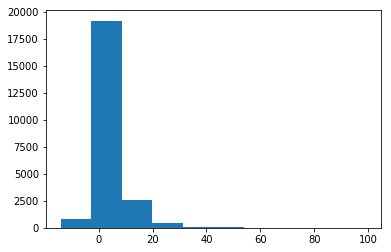

In [7]:
# (4)타겟변수 분포

print(plt.hist(target))
print(target.count())

### (5) 선수별 분석 VS 팀별 분석? 데이터 구조는 어떤식으로 되어있나?

In [8]:
# 한번의 플레이당(즉 동일 PlayID)당 22개의 선수들이 하나로 묶여서 경기를 진행
# 즉, 분석을 위해선 22개 행의 단위로 GROUP을 지어서 분석을 실시할 필요가 있음

rawdata[rawdata["PlayId"] == rawdata["PlayId"][0]][["GameId","PlayId","Team","DisplayName","TimeHandoff","Position"]]

,GameId,PlayId,Team,DisplayName,TimeHandoff,Position
0,2017090700,20170907000118,away,Eric Berry,2017-09-08T00:44:06.000Z,SS
1,2017090700,20170907000118,away,Allen Bailey,2017-09-08T00:44:06.000Z,DE
2,2017090700,20170907000118,away,Justin Houston,2017-09-08T00:44:06.000Z,DE
3,2017090700,20170907000118,away,Derrick Johnson,2017-09-08T00:44:06.000Z,ILB
4,2017090700,20170907000118,away,Ron Parker,2017-09-08T00:44:06.000Z,FS
5,2017090700,20170907000118,away,Dee Ford,2017-09-08T00:44:06.000Z,DE
6,2017090700,20170907000118,away,Terrance Mitchell,2017-09-08T00:44:06.000Z,CB
7,2017090700,20170907000118,away,Phillip Gaines,2017-09-08T00:44:06.000Z,CB
8,2017090700,20170907000118,away,Daniel Sorensen,2017-09-08T00:44:06.000Z,SS
9,2017090700,20170907000118,away,Marcus Peters,2017-09-08T00:44:06.000Z,CB


### 2) 이상치 탐색

### (1) 박스플롯 : 3IQR을 넘어가는 이상치의 갯수. 컴퓨팅 파워상 박스플롯을 그릴 수 없으므로 대안적으로 데이터프레임으로 정리

In [9]:
IQR = rawdata.describe().loc["75%",:] - rawdata.describe().loc["25%",:]

In [10]:
lower_bound = rawdata.describe().loc["25%"] - 1.5 * IQR
upper_bound = rawdata.describe().loc["75%"] + 1.5 * IQR

In [11]:
# (1) 1Q - 1.5IQR인 하한 초과

(rawdata.loc[:,(rawdata.dtypes != "object").values] < lower_bound).aggregate(lambda x : x.value_counts(),axis="index")

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
False,509762.0,509762.0,509762.0,495044,509762.0,509762.0,509762.0,509762.0,509762.0,428376,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,420310,509718,508442,509762.0,509762.0,507496,464508
True,NaN,NaN,NaN,14718,NaN,NaN,NaN,NaN,NaN,81386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89452,44,1320,NaN,NaN,2266,45254


In [12]:
# (2) 3Q + 1.5IQR인 상한 초과

(rawdata.loc[:,(rawdata.dtypes != "object").values] > upper_bound).aggregate(lambda x : x.value_counts(),axis="index")

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
False,509762.0,509762.0,509762.0,495625,507290,504107,508233,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,509762.0,505560,498828,502304,502920,509762.0,509762.0,479908,509762.0,509762.0,509762.0,509762.0
True,NaN,NaN,NaN,14137,2472,5655,1529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202,10934,7458,6842,NaN,NaN,29854,NaN,NaN,NaN,NaN


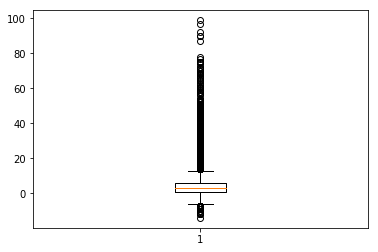

In [13]:
# (3) Target변수의 이상값

plt.boxplot(target)
plt.show()

(array([7.000e+00, 2.100e+01, 1.980e+02, 1.299e+03, 5.933e+03, 7.993e+03,
        3.892e+03, 1.651e+03, 8.200e+02, 6.050e+02]),
 array([-14. , -10.9,  -7.8,  -4.7,  -1.6,   1.5,   4.6,   7.7,  10.8,
         13.9,  17. ]),
 <a list of 10 Patch objects>)

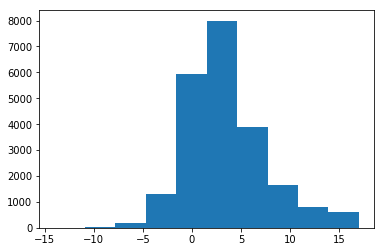

In [14]:
# 2 표준편차를 넘어가는 타겟변수를 제외했을 때 분포

plt.hist(target.loc[(target < target.mean() + 2*target.describe()["std"]).values])

### (2) 결측치

In [15]:
print ("결측치 표시기")
missmap = rawdata.isnull().sum().to_frame().sort_values(0, ascending = False)
missmap[missmap[0] != 0]/22

결측치 표시기


,0
WindDirection,3647.000000
WindSpeed,3065.000000
Temperature,2206.000000
GameWeather,1984.000000
StadiumType,1497.000000
FieldPosition,292.000000
Humidity,280.000000
OffenseFormation,5.000000
DefendersInTheBox,3.000000
Orientation,0.818182


### 과연 결측치들은 어느 변수와 가장 큰 연관성을 갖고 있을까?

## - 바람 방향(WindDirection)

In [16]:
rawdata.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance', 'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation', 'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'], dtype='object')

In [17]:
rawdata["WindDirection"].unique()

array(['SW', 'NNE', 'SE', 'East', nan, 'NE', 'North', 'S', 'Northwest',
       'SouthWest', 'ENE', 'ESE', 'SSW', 'NW', 'Northeast', 'From S', 'W',
       'South', 'West-Southwest', 'E', '13', 'N', 'NNW',
       'South Southeast', 'SSE', 'West', 'WSW', 'From SW', 'WNW', 's',
       'NorthEast', 'from W', 'W-NW', 'South Southwest', 'Southeast',
       'From WSW', 'West Northwest', 'Calm', 'From SSE', 'From W',
       'East North East', 'From ESE', 'EAST', 'East Southeast',
       'From SSW', '8', 'North East', 'Southwest', 'North/Northwest',
       'From NNE', '1', 'N-NE', 'W-SW', 'From NNW'], dtype=object)

In [18]:
temp_index = rawdata.groupby("PlayId")["WindDirection"].apply(lambda x : x.index[0])
rawdata.loc[temp_index,"WindDirection"].value_counts()

NE                 1375
NW                 1238
SW                 1174
SE                 1172
WSW                1101
N                  1054
W                  1009
S                   972
NNE                 927
South               924
SSW                 905
WNW                 869
North               781
NNW                 638
West                619
SSE                 608
E                   583
ENE                 491
ESE                 449
East                334
Northwest           185
From SW             176
Northeast           166
NorthEast           146
From S              143
                   ... 
Southwest            82
W-NW                 82
West-Southwest       63
8                    52
1                    51
North East           50
East Southeast       49
Calm                 48
West Northwest       48
N-NE                 46
From W               45
North/Northwest      44
From SSW             44
W-SW                 44
From NNE             44
South Southeast 

In [19]:
how_groupby = "HomeTeamAbbr"

temp = rawdata.groupby(how_groupby)["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)
# 각 홈팀 이름별로 nan값만 발생하는 경우가 있다. 이들의 홈구장의 환경과 연관이 있는걸까?

,Categories,num,nan/total
HomeTeamAbbr,,,
ARI,"[nan, NE, SE, N, W]",450.0,0.602410
ATL,"[NW, nan, ESE, E, SW]",532.0,0.767677
CLE,"[East, SE, West, South, N, SW, nan, North]",39.0,0.053867
DAL,"[nan, North, North/Northwest, SSE]",584.0,0.805517
DEN,"[SouthWest, E, NorthEast, North, Northeast, So...",42.0,0.056075
DET,[nan],693.0,1.000000
KC,"[Northeast, South Southeast, Northwest, South ...",52.0,0.074605
LA,"[SW, nan, W, North, ESE, NNW, WSW]",155.0,0.218003
MIN,[nan],735.0,1.000000


In [20]:
how_groupby = "Turf"

temp = rawdata.groupby(how_groupby)["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

# 아니 이건 또 왜 같은 잔디종류를 여러개로 나누고 그래

,Categories,num,nan/total
Turf,,,
Artificial,"[NNE, nan, SSW, ENE, N, ESE, NW, S, NE, WSW, N...",584.0,0.288823
Field Turf,"[SW, nan, NE, N, SE, WNW, North, West, SSW]",1433.0,0.661283
Field turf,[nan],45.0,1.000000
FieldTurf,"[S, NE, NNE, NNW, WNW, East, ENE, South, E, NW...",50.0,0.033135
FieldTurf 360,"[NW, nan]",278.0,0.876972
FieldTurf360,"[nan, ESE, E, SW]",254.0,0.675532
Grass,"[SE, East, NE, North, SW, SouthWest, NW, From ...",810.0,0.107171
Natural Grass,"[Northwest, ESE, North, Northeast, NE, South, ...",102.0,0.020953
Natural grass,"[West-Southwest, NW, N, nan]",54.0,0.247706


In [21]:
(rawdata["GameWeather"] == "Controlled Climate").value_counts()

False    497222
True      12540
Name: GameWeather, dtype: int64

In [22]:
how_groupby = "StadiumType"

temp = rawdata.groupby(how_groupby)["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

# 마찬가지로 실내돔인 경우 바람방향은 결측치이다.

,Categories,num,nan/total
StadiumType,,,
Closed Dome,[nan],97.0,1.000000
Dome,"[nan, NE, SE, N, E, W]",410.0,0.520305
"Dome, closed",[nan],83.0,1.000000
"Domed, Open",[nan],35.0,1.000000
"Domed, closed",[nan],269.0,1.000000
Indoor,"[nan, North/Northwest, SSE]",646.0,0.880109
"Indoor, Roof Closed",[nan],48.0,1.000000
Indoors,"[nan, NNE, SE, N, SW, NE, WSW, WNW, NW, E]",1314.0,0.707593
Outdoor,"[SW, SE, East, S, Northwest, SouthWest, ENE, E...",616.0,0.050625


In [23]:
how_groupby = "WindSpeed"

temp = rawdata.groupby(how_groupby)["WindDirection"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

# calm이거나 0인경우에 바람 방향은 결측치이다.

,Categories,num,nan/total
WindSpeed,,,
0.0,"[nan, SSE, SE]",182.0,0.654676
1,"[From S, SW, nan]",54.0,0.224066
5.0,"[North, SouthWest, ENE, NNE, East, SE, NE, Wes...",37.0,0.030503
0,"[nan, N]",307.0,0.882184
Calm,[nan],50.0,1.000000


### 결론 : 바람방향은 바람이 발생하지 않는 경우에 nan으로 처리되어 있다.
### 근데 입력이 개판이다. 시간 들여서 전처리 할 거 아니면 그냥 버리자..

### - StadiumType 결측값

In [34]:
# StadiumType의 종류
rawdata["StadiumType"].unique()

array(['Outdoor', 'Outdoors', 'Indoors', 'Retractable Roof', 'Indoor',
       'Retr. Roof-Closed', 'Open', nan, 'Indoor, Open Roof',
       'Retr. Roof - Closed', 'Outddors', 'Dome', 'Domed, closed',
       'Indoor, Roof Closed', 'Retr. Roof Closed',
       'Outdoor Retr Roof-Open', 'Closed Dome', 'Oudoor', 'Ourdoor',
       'Dome, closed', 'Retr. Roof-Open', 'Heinz Field', 'Outdor',
       'Retr. Roof - Open', 'Domed, Open', 'Domed, open', 'Cloudy',
       'Bowl', 'Outside', 'Domed'], dtype=object)

In [181]:
# StadiumType의 빈도수

temp_index = rawdata.groupby("PlayId")["StadiumType"].apply(lambda x : x.index[0])
rawdata.loc[temp_index,"StadiumType"].value_counts()

#아 오타나있고.. 개판이네

Outdoor                   12168
Outdoors                   3067
Indoors                    1857
Dome                        788
Indoor                      734
Retractable Roof            722
Open                        437
Retr. Roof-Closed           326
Retr. Roof - Closed         293
Domed, closed               269
Domed, open                 122
Closed Dome                  97
Domed                        83
Dome, closed                 83
Oudoor                       54
Indoor, Roof Closed          48
Retr. Roof Closed            48
Retr. Roof-Open              45
Outddors                     44
Bowl                         44
Heinz Field                  41
Outdoor Retr Roof-Open       40
Retr. Roof - Open            40
Outdor                       39
Ourdoor                      39
Indoor, Open Roof            39
Outside                      37
Domed, Open                  35
Cloudy                       35
Name: StadiumType, dtype: int64

In [131]:
how_groupby = "Stadium"

temp = rawdata.groupby(how_groupby)["StadiumType"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

# StubHub Center는 스타디움 유형이 결측처리 되어있다.

,Categories,num,nan/total
Stadium,,,
MetLife Stadium,"[nan, Outdoor, Outdoors]",788.0,0.823406
StubHub Center,[nan],665.0,1.000000
TIAA Bank Field,"[Open, Outdoor, nan, Cloudy, Bowl]",44.0,0.150171


In [132]:
how_groupby = "HomeTeamAbbr"

temp = rawdata.groupby(how_groupby)["StadiumType"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

# 홈팀 중 NYG는 nan값밖엔 없다.

,Categories,num,nan/total
HomeTeamAbbr,,,
JAX,"[Open, Outdoors, Outdoor, nan, Cloudy, Bowl]",44.0,0.060606
LAC,"[nan, Outdoors]",665.0,0.941926
NYG,[nan],788.0,1.000000


## - Temperature 결측값

In [38]:
rawdata_temp = rawdata.copy()

temp = rawdata_temp.groupby("PlayId")["Temperature"].apply(lambda x : x.index[0])

rawdata_temp.loc[temp.values,"Temperature_unique"] = rawdata_temp.loc[temp.values,"Temperature"].copy()

rawdata_temp.loc[:,"PlayId_count"] = rawdata_temp.groupby("PlayId")["Temperature"].cumcount()

temp = rawdata_temp.pivot_table(index = ["PlayId"], columns = ["PlayId_count"],values=["Temperature_unique"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEB78DB1D0>]],
      dtype=object)

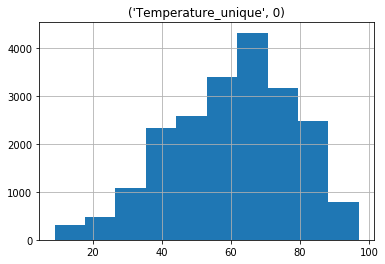

In [55]:
temp.hist()

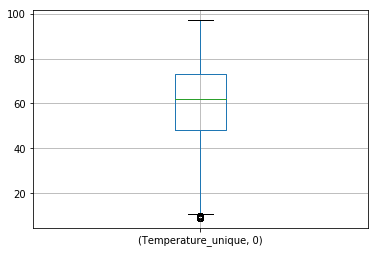

In [41]:
temp.boxplot()

In [50]:
temp.isnull().iloc[:,0].value_counts()

False    20965
True      2206
Name: (Temperature_unique, 0), dtype: int64

In [133]:
how_groupby = "WindDirection"

temp = rawdata.groupby(how_groupby)["Temperature"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

,Categories,num,nan/total
WindDirection,,,
SSE,"[63.0, 75.0, 70.0, nan, 71.0, 61.0, 53.0, 87.0...",46.0,0.075658


In [134]:
how_groupby = "Stadium"

temp = rawdata.groupby(how_groupby)["Temperature"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]
temp.unique()[nan_compromised.index]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

,Categories,num,nan/total
Stadium,,,
AT&T Stadium,"[nan, 54.0, 58.0, 74.0, 70.0]",532.0,0.733793
Mercedes-Benz Stadium,"[nan, 60.0, 59.0, 67.0]",532.0,0.813456
NRG Stadium,"[80.0, 89.0, 85.0, 84.0, 60.0, nan, 51.0, 78.0...",46.0,0.084559
State Farm Stadium,"[nan, 82.0, 72.0, 70.0]",192.0,0.478803
U.S. Bank Stadium,"[70.0, nan]",686.0,0.933333
University of Phoenix Stadium,"[nan, 79.0, 71.0]",218.0,0.630058


In [135]:
how_groupby = "StadiumType"

temp = rawdata.groupby(how_groupby)["Temperature"]
nan_compromised = temp.value_counts(dropna=False).unstack().iloc[:,0].isnull() == False
nan_compromised = nan_compromised[nan_compromised]

key_1 = {"Categories" : temp.unique()[nan_compromised.index]}
key_2 = {"num" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()}

total = rawdata.groupby(how_groupby)["PlayId"].count()[nan_compromised.index]/22

key_3 = {"nan/total" : (temp.value_counts(dropna=False).unstack().iloc[:,0]/22).dropna()/total}


pd.concat([DataFrame(key_1),DataFrame(key_2),DataFrame(key_3)],axis=1)

,Categories,num,nan/total
StadiumType,,,
Closed Dome,[nan],97.0,1.000000
Dome,"[nan, 79.0, 71.0, 82.0, 72.0, 68.0, 53.0, 70.0]",410.0,0.520305
"Dome, closed",[nan],83.0,1.000000
"Domed, Open",[nan],35.0,1.000000
"Domed, closed",[nan],269.0,1.000000
Indoor,"[nan, 74.0, 70.0]",646.0,0.880109
"Indoor, Roof Closed",[nan],48.0,1.000000
Indoors,"[68.0, 70.0, 85.0, 84.0, 54.0, 79.0, 57.0, 69....",572.0,0.308024
Retractable Roof,"[80.0, 87.0, 89.0, 85.0, 84.0, 60.0, nan, 51.0...",46.0,0.063712


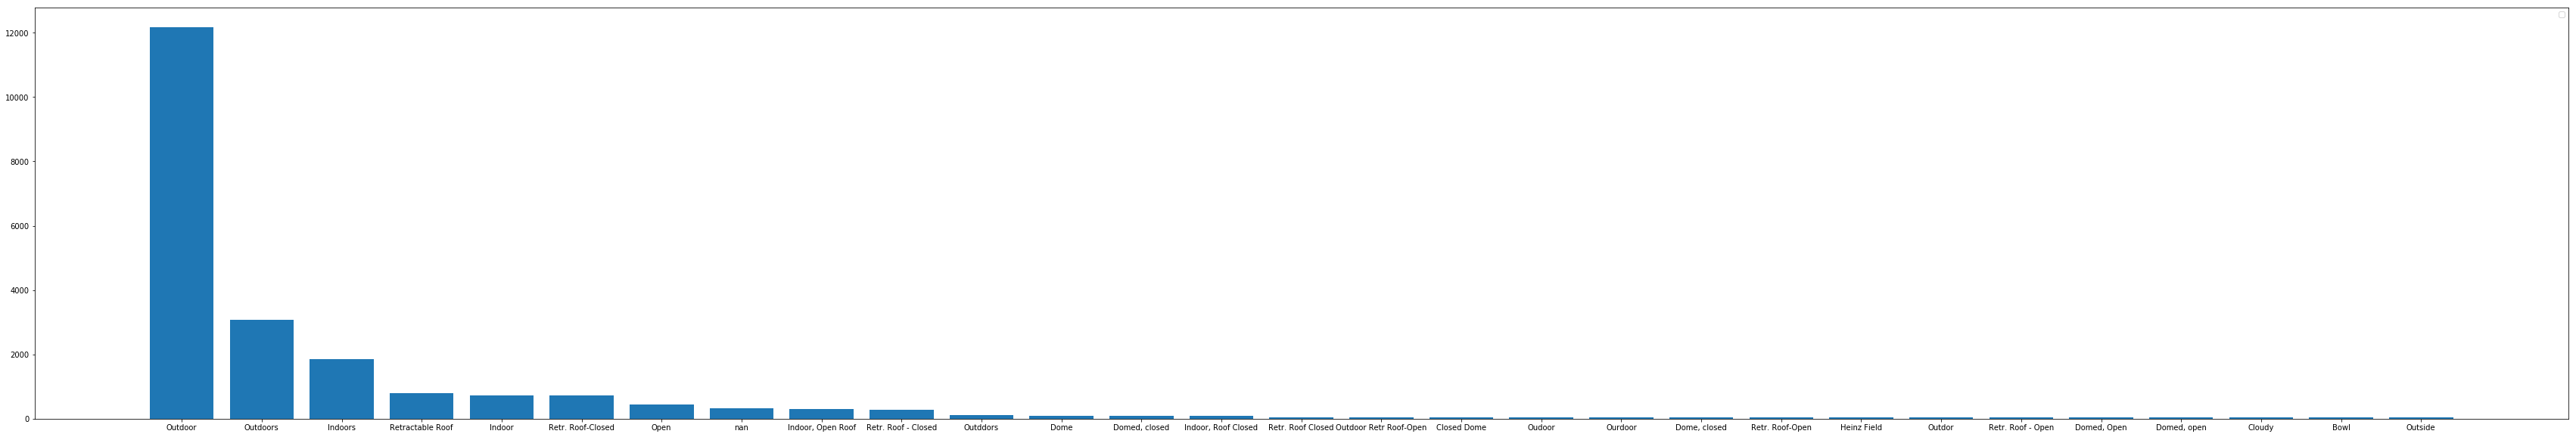

In [178]:
plt.figure(figsize = (60,10))

x = np.arange(len(rawdata["StadiumType"].unique()) - 1)
value = (rawdata["StadiumType"].value_counts()/22).values

plt.bar(x,value)

plt.xticks(x,rawdata["StadiumType"].unique())
plt.legend(x,value)

plt.show()

### 결론
### 돔이거나, Indoor인 경우 기온이 결측값이다.

## 3)진행 Yard의 시계열성 여부 판단

In [184]:
rawdata_temp = rawdata.copy()

In [185]:
# (1) Play 기준으로, 매 22개 행이 동일한 Yards를 공유한다. 따라서, 각 PlayId의 맨 처음 행에만 Yard를 저장하는 Series를 만든다.

temp = rawdata_temp.groupby("PlayId")["Yards"].apply(lambda x : x.index[0])

# (2) 맨 처음 행의 Yard만 해당 값을 집어넣고, 나머지 21개 행은 NaN으로 처리하는 새로운 열을 만든다.

rawdata_temp.loc[temp.values,"Yards_unique"] = rawdata.loc[temp.values,"Yards"].copy()

# (3)이번엔 Play 기준이 아닌 Game 기준으로 묶어서, 각 Play가 Game의 몇 번째 경기인지 알려주는 열을 만든다. 이를 이용하여 피보팅한다.

rawdata_temp.loc[:,"GameId_count"] = rawdata_temp.groupby("GameId")["PlayId"].cumcount()

# (4)인덱스를 GameId로, 그 인덱스에 해당하는 시계열인 "Play"를 열로, 그 값은 아까 첫 번재 값을 제외한 21개 행은 NaN인 Yards_unique를
# 적용한다.

temp = rawdata_temp.pivot_table(index = ["GameId"], columns = ["GameId_count"],values=["Yards_unique"])

In [186]:
temp.head()

Yards_unique                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GameId_count         0     22   44   66    88    110  132   154   176   198  220   242   264   286  308  330  352  374   396   418   440  462  484  506  528  550  572   594  616   638  660  682   704  726   748  770  792  814  836  858  880   902  924  946   968   990  1012  1034  1056 1078 1100 1122 1144 1166 1188 1210 1232 1254 1276 1298 1320 1342 1364 1386 1408 1430 1452 1474 1496 1518 1540 1562 1584 1606 1628 1650 1672 1694 1716 1738 1760 1782 1804 1826 1848
GameId                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2017090700            8.0   3.0  5.0  2.0   7.0  10.0 -1.0   0.0   9.0   9.0  2.0   3.0  13.0   4.0  0.0  4.0  4.0  4.0   0.0  16.0   9.0  4.0  2.0  2.0  3.0  1.0  4.0   4.0  7.0  10.0  2.0 -4.0   4.0  5.0   1.0  0.0  1.0  1.0  7.0  4.0 -6.0  13.0  0.0  2.0  14.0   7.0  4.0  58.0  21.0  2.0  2.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091000            3.0  16.0  4.0  3.0  10.0  -6.0  3.0  -1.0   1.0  23.0  0.0  14.0   2.0  20.0 -1.0  3.0  4.0  3.0   2.0   0.0   1.0  1.0  0.0  0.0  2.0  8.0  1.0   8.0  1.0  27.0  0.0  3.0   1.0  1.0  11.0  4.0  2.0 -1.0  5.0 -3.0  2.0   1.0  3.0  0.0   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091001            6.0   3.0  5.0  2.0  -1.0   1.0  4.0  11.0  15.0   2.0  5.0   0.0   1.0   1.0  3.0  7.0  5.0  3.0  46.0   4.0   2.0  5.0  6.0  9.0  7.0  2.0  0.0   5.0  1.0   1.0  6.0  0.0   6.0 -3.0   3.0  2.0 -1.0  0.0  NaN  NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091002           12.0   1.0 -1.0  7.0   1.0   0.0  4.0   1.0   8.0   1.0  4.0   2.0  23.0   3.0  1.0  1.0  2.0  4.0   7.0   1.0  10.0  4.0  1.0  4.0  2.0  5.0  7.0  17.0  2.0   3.0  2.0  7.0   2.0  7.0   6.0  3.0  2.0  2.0  4.0  6.0  0.0   4.0  7.0  1.0   3.0  11.0  2.0  -3.0   4.0  1.0  4.0  8.0 -2.0 -1.0  2.0  8.0  3.0  4.0 -2.0  7.0  2.0 -4.0 -5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017091003           -9.0   4.0  5.0  3.0   1.0   2.0  6.0   3.0   1.0   2.0  0.0   3.0  -1.0   1.0  0.0  1.0  1.0  3.0   5.0   3.0   4.0  2.0  2.0  1.0  5.0  6.0  5.0   4.0  1.0   1.0  0.0  1.0  15.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

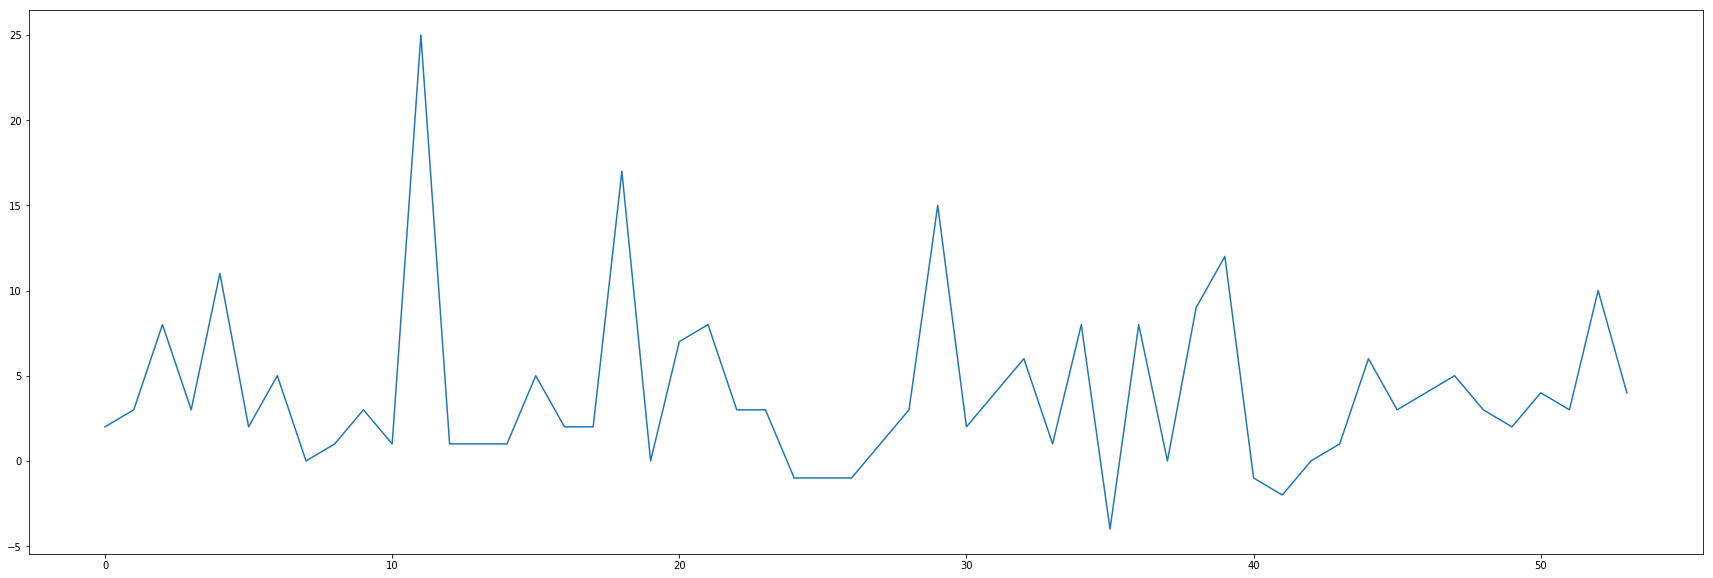

In [187]:
# 피크가 있는 시점이 보인다. 어떤 변수가 피크에 영향을 준걸까?

plt.figure(figsize = (30,10))

plt.plot(temp.loc[temp.index[100],:].values)
plt.show()

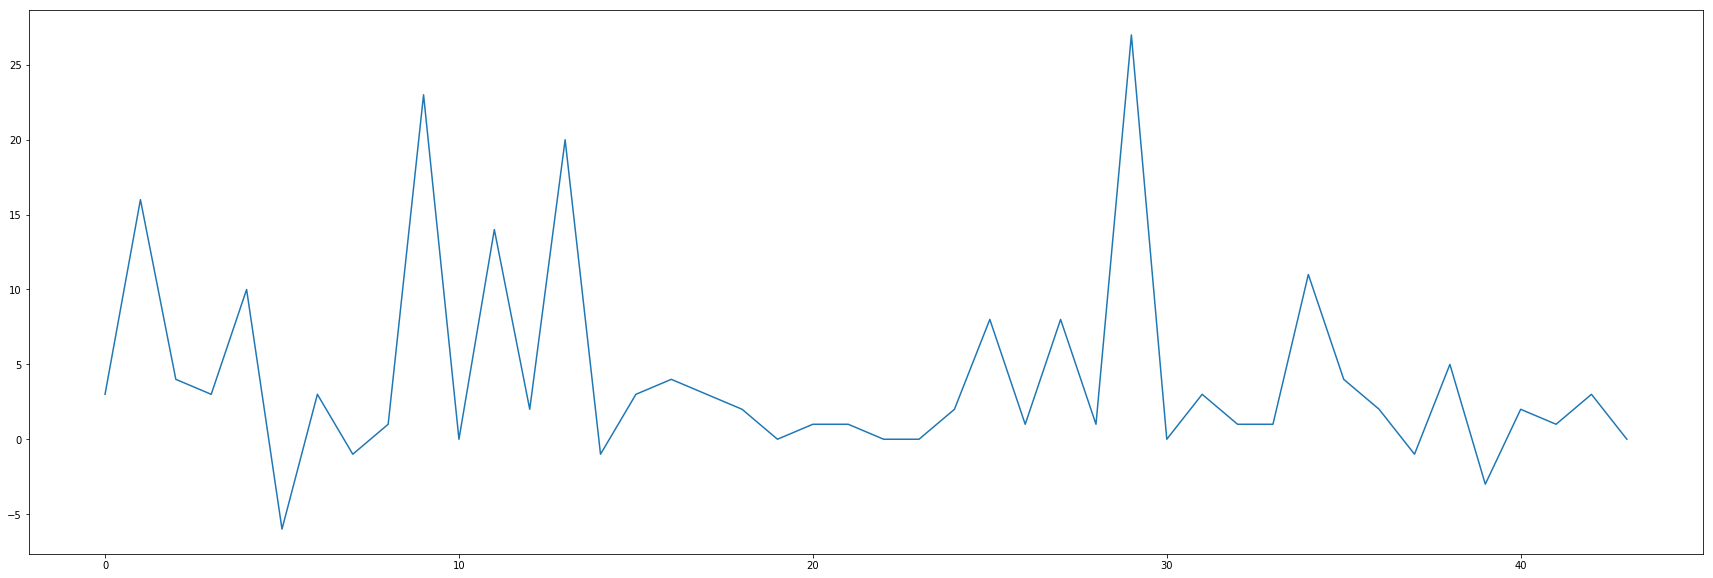

In [188]:
plt.figure(figsize = (30,10))

plt.plot(temp.loc[temp.index[1],:].values)
plt.show()

## 4) 선수별 포지션 일람
### 데이터 전처리시 변수별로 *22의 와이드폼으로 펼칠 때, 컬럼을 포지션별로 개별 할당이 가능한지 탐색

In [8]:
rawdata["Position"].unique()

array(['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'WR', 'TE', 'T', 'QB', 'RB',
       'G', 'C', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'OT', 'OG', 'HB', 'DB',
       'S', 'DL', 'SAF'], dtype=object)

In [110]:
# (1) 전체 선수들의 수 VS 포지션별 선수들의 수

# 몇몇 선수들은 하나 이상의 포지션을 맡은 것으로 보인다. 12만큼의 중복된 인원이 존재한다.

print("전체 선수들의 수")
print(len(rawdata["DisplayName"].unique()))
print("포지션 별 선수들의 수")
print(len(rawdata.groupby("DisplayName")["Position"].value_counts()))

전체 선수들의 수
2230
포지션 별 선수들의 수
2242


In [10]:
# (2) 중복 포지션을 갖고있는 선수들 골라내기

temp = DataFrame(rawdata.groupby("DisplayName")["Position"].value_counts()).unstack().unstack().unstack()

for i in range(0,len(temp.T)):
    if temp.isnull().iloc[:,i].value_counts()[0] != 1:
        print(temp.iloc[:,i].name)
        print(temp.iloc[:,i].Position.dropna().index.values)

Andre Smith
['LB' 'T']
Brandon Marshall
['ILB' 'WR']
Brandon Williams
['CB' 'DT' 'TE']
Chris Thompson
['RB' 'WR']
Isaiah Johnson
['DB' 'S']
Joe Thomas
['ILB' 'OT']
Kyle Fuller
['C' 'CB']
Marcus Williams
['CB' 'FS']
Michael Bennett
['DE' 'DT']
Michael Thomas
['SS' 'WR']
Nick Williams
['DT' 'WR']


In [11]:
# (3) 경기당 중복 포지션 골라내기
# 선수의 수 = 22명
# 포지션의 수 = 13

rawdata[rawdata["PlayId"] == rawdata["PlayId"][1]]["Position"].value_counts()

# 경기당 한개의 포지션에 여러명이 중복해서 맡을 수 있다.

CB     3
WR     3
DE     3
T      2
SS     2
G      2
ILB    1
TE     1
C      1
QB     1
RB     1
DT     1
FS     1
Name: Position, dtype: int64

# 5) 경기 시작후 선수들의 위치 변화

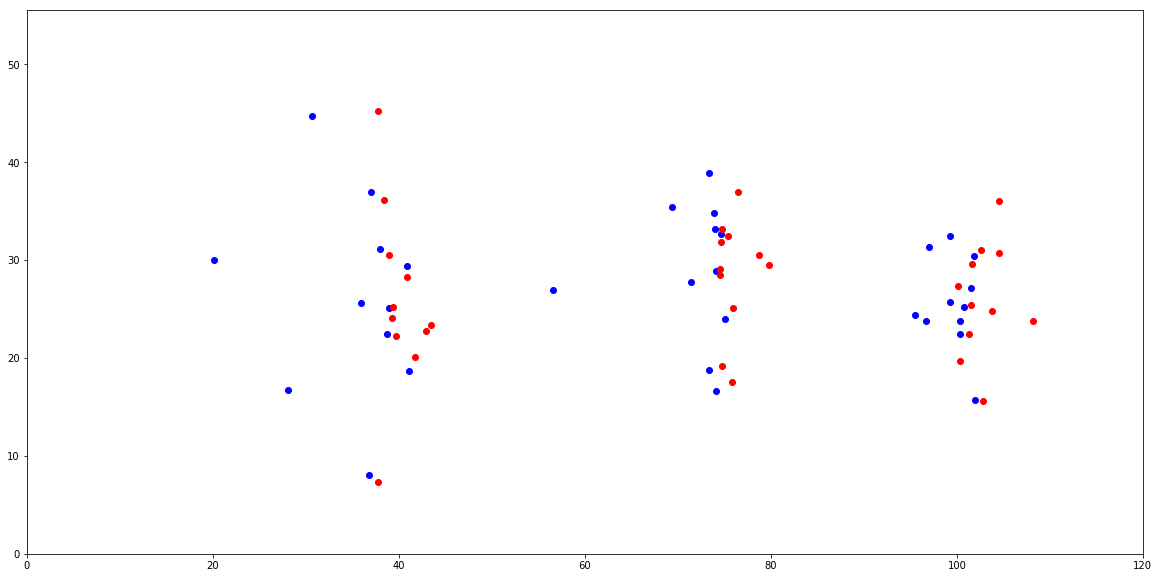

In [25]:
x_away_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "away"]["X"]
y_away_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "away"]["Y"]

x_home_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "home"]["X"]
y_home_1 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[0]][rawdata["Team"] == "home"]["Y"]

# ======================================================================================================

x_away_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "away"]["X"]
y_away_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "away"]["Y"]

x_home_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "home"]["X"]
y_home_2 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[5]][rawdata["Team"] == "home"]["Y"]

# =====================================================================================================

x_away_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "away"]["X"]
y_away_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "away"]["Y"]

x_home_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "home"]["X"]
y_home_3 = rawdata[rawdata["PlayId"] == rawdata["PlayId"].unique()[10]][rawdata["Team"] == "home"]["Y"]

plt.figure(figsize=(20,10))

plt.xlim(0,120)
plt.ylim(0,55.5)
# 첫 번째 경기
plt.scatter(x = x_away_1, y = y_away_1,c="b")
plt.scatter(x = x_home_1, y = y_home_1,c="r")
# 두 번째 경기
plt.scatter(x = x_away_2, y = y_away_2,c="b")
plt.scatter(x = x_home_2, y = y_home_2,c="r")
# 세 번째 경기
plt.scatter(x = x_away_3, y = y_away_3, c = "b")
plt.scatter(x = x_home_3, y = y_home_3, c = "r")

plt.show()

# 매 경기마다 시작위치가 달라진다

In [15]:
# 이상치 특징 : 
# 시계열적 특징 : 시계열을 확인해 봤을 때, 추세성은 없지만 스파이크는 존재한다.
# 매 iteration 자체의 특성 = 시작 위치, 속력, 각속도 등..

# 시작 위치와 골라인간의 직선거리(L2 Norm)을 고려(특성 엔지니어링)

# 두 개를 모두 고려한 모델을 생각해보자

# 데이터 전처리 - 결측치 처리

In [16]:
print ("결측치 표시기")
missmap = rawdata.isnull().sum().to_frame().sort_values(0, ascending = False)
missmap[missmap[0] != 0]

결측치 표시기


,0
WindDirection,80234
WindSpeed,67430
Temperature,48532
GameWeather,43648
StadiumType,32934
FieldPosition,6424
Humidity,6160
OffenseFormation,110
DefendersInTheBox,66
Orientation,18


# 데이터 전처리 - 카테고리 변수의 변환

In [195]:
rawdata_cat = rawdata.loc[:,(rawdata.dtypes == "object").values]

In [196]:
rawdata_cat.head()

,Team,DisplayName,GameClock,PossessionTeam,FieldPosition,OffenseFormation,OffensePersonnel,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,PlayerHeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Stadium,Location,StadiumType,Turf,GameWeather,WindSpeed,WindDirection
0,away,Eric Berry,14:14:00,NE,NE,SHOTGUN,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-0,12/29/1988,Tennessee,SS,NE,KC,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,8,SW
1,away,Allen Bailey,14:14:00,NE,NE,SHOTGUN,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,03/25/1989,Miami,DE,NE,KC,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,8,SW
2,away,Justin Houston,14:14:00,NE,NE,SHOTGUN,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,01/21/1989,Georgia,DE,NE,KC,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,8,SW
3,away,Derrick Johnson,14:14:00,NE,NE,SHOTGUN,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-3,11/22/1982,Texas,ILB,NE,KC,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,8,SW
4,away,Ron Parker,14:14:00,NE,NE,SHOTGUN,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,6-0,08/17/1987,Newberry,FS,NE,KC,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,8,SW


# 데이터 전처리 - 와이드폼 전환

In [24]:
rawdata_cat = rawdata.copy()

In [25]:
#rawdata_QB = rawdata_cat[rawdata_cat["Position"] == "QB"].copy()
#rawdata_cat = rawdata_cat[rawdata_cat["Position"] != "QB"].copy()

In [26]:
# 왜 22가 나오는거지?

#(rawdata_cat.groupby(['PlayId']).cumcount() + 1).value_counts()

In [27]:
## 22가 존재하는, 즉 QB가 정상적으로 제거되지 않은 PlayID들

#rawdata_cat[rawdata_cat["row_number"] == 22]["PlayId"]

In [28]:
#rawdata_cat.loc[0:22,"Position"].value_counts().sort_index()

In [29]:
#rawdata_cat[rawdata_cat["PlayId"] == 20170924102908]["Position"].value_counts().sort_index()

In [30]:
## QB가 존재하는 경우엔 ILB가, 그렇지 않은 경우엔 MLB과 OLB로 구분되어 있다.

In [31]:
#rawdata[0:22]["Position"].value_counts().sort_index()

In [32]:
#rawdata[rawdata["PlayId"] == 20170924102908]["Position"].value_counts().sort_index()

In [33]:
# numerical한 변수들만 담기

columns_numeric = rawdata_cat.loc[0:0,(rawdata_cat.dtypes != "object").values].columns.copy()
columns_numeric = columns_numeric[2:]
columns_numeric = columns_numeric[columns_numeric != "Yards"]

In [34]:
# categorical한 변수들만 담기

columns_cat = rawdata.loc[0:0,(rawdata.dtypes == "object").values].columns.copy()

In [35]:
rawdata_cat['row_number'] = rawdata_cat.groupby(['PlayId']).cumcount()

In [36]:
new_df = rawdata_cat.pivot_table(index=['PlayId'], columns=['row_number'], values=columns_numeric)

In [37]:
new_df.head()

A                                                                                                                               DefendersInTheBox                                                                                                              Dir                                                                                                                                                                           Dis                                                                                                                               Distance                                                                                     Down                                                                HomeScoreBeforePlay                                                                Humidity                                                                                                                               JerseyNumber                              \
row_number        0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21                0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21      0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21    0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21       0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21                  0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21       0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21           0   1   2   3   4   5   6   7    
PlayId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
20170907000118  1.13  1.35  0.59  0.54  2.43  0.32  0.83  0.74  1.86  0.76  0.73  1.39  0.82  1.36  0.80  1.22  0.77  1.48  3.35  1.51  0.69  1.55               6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  177.18  198.70  202.73  105.64  164.31   95.01  322.59  270.04   55.31  190.84  274.14  284.15  215.90  222.76  198.55  110.86  195.09  278.52  245.74  267.32  242.05  255.67  0.40  0.01  0.31  0.02  0.16  0.18  0.02  0.13  0.28  0.51  0.01  0.55  0.19  0.32  0.19  0.00  0.59  0.51  0.38  0.17  0.22  0.24        2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2    3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3                   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0           29  97  50  56  38  55  39  23   
20170907000139 

In [38]:
new_columns = np.zeros(1)

for i in rawdata_cat[columns_numeric].columns:
    for j in range(0,22):
        temp = np.array(str(i) + str(j))
        new_columns = np.hstack([new_columns,temp])

new_columns = new_columns[1:]

new_df.columns = new_columns.copy()

In [39]:
## modeling
## 우선 22개 행의 변수들을 하나의 행인 WideForm으로 만든다
## 즉, 하나의 변수당 22개의 열들이 생긴다(X_1, X_2....X_22, Y_1,y_2,....Y_22 등)

### 데이터 분할

In [40]:
x = new_df.copy()
y = rawdata_cat.groupby("PlayId")["Yards"].mean()

print(len(x) == len(y))
print("==================================")
print(Series(x.index.values == y.index).value_counts())

True
True    23171
dtype: int64


In [45]:
X_train, y_train, X_test, y_test = train_test_split(x,y,test_size = 0.3)
lgb_train = lgb.Dataset(X_train, y_train)

## 모델링 : XGBOOST

In [42]:
from sklearn.metrics import f1_score

def manual_scoring(preds, dtrain):
    labels = dtrain.get_label()
    preds = preds.reshape(-1, 4)  
    preds = preds.argmax(axis = 1)
    f_score = f1_score(preds, labels, average = 'macro')
    return 'f1_score', f_score, True

evals_result = {}

In [43]:
model4 = lgb.LGBMClassifier(boosting_type = "gbdt",
                            objective = "mutliclass",
                            max_depth = -1,
                            random_state = 0)

In [44]:
gridParams = {
    'learning_rate': [0.01, 0.005],
    'n_estimators': [40,80,100],
    'num_leaves': [10,20,30,40],
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    }


grid = GridSearchCV(model4, 
                    gridParams,
                    verbose = 0,
                    cv=5,n_jobs=-1)

In [ ]:
grid.fit(x,y)

In [ ]:
model1 = lgb.train(params, lgb_train, num_boost_round=3000,  valid_sets=[lgb_train], 
                  early_stopping_rounds=1000, verbose_eval=100,feval = manual_scoring,evals_result=evals_result)

lgb.plot_metric(evals_result)

## 모델링 : Neural Net

## 모델링 : LSTM